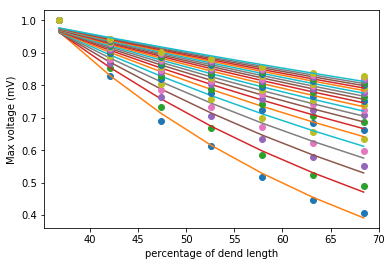

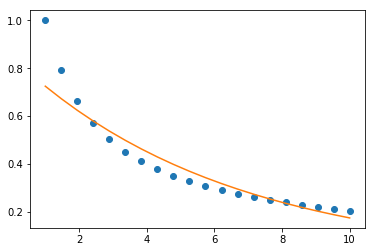

In [56]:
# Init
import neuron
import numpy
import matplotlib.pyplot as plt

neuron.h.load_file("stdrun.hoc");
neuron.h.stdinit();

# Define soma
soma = neuron.h.Section(name='soma')
soma.L = 40
soma.diam = 40
soma.insert('hh');
soma.gl_hh = 5e-4 # Leak conductance, S/cm^2
soma.el_hh = -65 # Reversal potential leak current, mV
soma.gkbar_hh = 0.0 # in S/cm^2
soma.gnabar_hh = 0.0

# Define dendrite
dend = neuron.h.Section(name='dend')
dend.connect(soma, 0)
dend.insert('hh')
dend.el_hh = -65 # Reversal potential leak current, mV
dend.gl_hh = 5e-4 # Leak conductance, S/cm^2
dend.gkbar_hh = 0.0
dend.gnabar_hh = 0.0
dend.L = 400 # micron
dend.diam = 1.0 # micron
dend.nseg = 51 # number of segments in the dendritic section
dend.Ra = 200

# Define plots
time = neuron.h.Vector()
voltage = neuron.h.Vector()

time.record(neuron.h._ref_t)
voltage.record(dend(0)._ref_v);

def plot_tv(time_array, voltage_array, show=True, label=None, constants=[]):
    import matplotlib.pyplot as plt
    import numpy
    plt.plot(time_array, voltage_array, label=label)
    for constant in constants:
        plt.plot(time_array, constant*numpy.ones(len(time_array)))
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane voltage (mV)')
    if show:
        plt.show()

voltage_dist = {}
atts = []


dend_diam_range = numpy.linspace(1.0, 10.0, 20)

for dend_diam in dend_diam_range:
    dend.diam = dend_diam
    distance_range = numpy.linspace(0.0, 1.0, 20)
    # Add synapse
    for syn_location in distance_range:
        # syn_location = .5 # 0.0 is at soma, 1.0 is at end of dendrite

        expsyn = neuron.h.ExpSyn(syn_location, sec=dend) # We add a synapse to the middle (.5) of the dendrite

        netstim = neuron.h.NetStim()
        netstim.interval = 1
        netstim.number = 1
        netstim.start = 20
        netstim.noise = 0

        netcon = neuron.h.NetCon(netstim, expsyn)
        netcon.weight[0] = .01
        neuron.h.tstop = 100
        neuron.h.run()

        voltage_dist[syn_location] = numpy.array(voltage)


    #for distance in distance_range:
    #    plot_tv(time, voltage_dist[distance], show=False, label='%.0f%% of dend length' % (distance*100))

    # plt.legend()
    # plt.show()


    distance_range = distance_range[7:14]
    max_voltage_dend = []
    for distance in distance_range:
        max_voltage_dend.append(max(voltage_dist[distance])+65)

    x = distance_range*100
    y = max_voltage_dend/(max(voltage_dist[distance_range[0]])+65)
    plt.plot(x, y, 'o')
    a, b = numpy.polyfit(x, numpy.log(y), 1)
    atts.append(a)
    plt.plot(x, numpy.exp(a*x + b))
    plt.xlabel('percentage of dend length')
    plt.ylabel('Max voltage (mV)')

plt.show()

x_diam = dend_diam_range
y_diam = atts/atts[0]
plt.plot(x_diam, y_diam, 'o')
a_diam, b_diam = numpy.polyfit(x_diam, numpy.log(y_diam), 1)
plt.plot(x_diam, numpy.exp(a_diam*x_diam + b_diam))
plt.show()